## Observations and Insights 

. The Study shows they had examined and sample of 249 mice. One mouse had duplicated data which was excluded. The analysis shows that there were 49.0% Female and 51.0% male.

. The correlation between Mouse Wegith (g) and Average Tumor Volume is 0.84. This number shows strong positive correlations which shows that when the mouse weight increases the average tumor volume also increases.

. From the selected four treatments, Capomulin and Ramicane reduces the size of tumors better than other two treatments.

. Out of 10 treatment regimens used for the animal study but only four treament were identified as promising treatments. They are Capomulin, Ramicane, Infubinol, and Ceftamin.

. The regression analysis help us understand to show how much the average of tumor volume will change when the weight of the mic change. 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge( study_results,mouse_metadata, how="left", on ="Mouse ID")


# Display the data table for preview
combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [60]:
# Checking the number of mice.
mice_count = len(combined_data_df["Mouse ID"].unique())

#Display the total count of unique Mouse ID.
mice_count

249

In [61]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rec = combined_data_df.loc[combined_data_df.duplicated(["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_rec


array(['g989'], dtype=object)

In [62]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_g989 = combined_data_df[combined_data_df["Mouse ID"] == "g989"]
dup_g989


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df.loc[combined_data_df["Mouse ID"] != 'g989']

clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [64]:
# Checking the number of mice in the clean DataFrame.
clean_count_df = len(clean_df["Mouse ID"].unique())
clean_count_df

248

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mean = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dev = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": standard_dev,
                                "Tumor Volume Std. Err.": sem})

summary_stats_df





,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

agg = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

# Using the aggregation method, produce the same summary statistics in a single line
agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

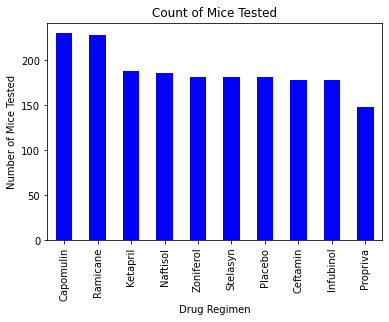

In [67]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_sum = clean_df["Drug Regimen"].value_counts()
#bar_sum
bar_sum.plot.bar(rot = 90, color = "blue")
plt.title("Count of Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()



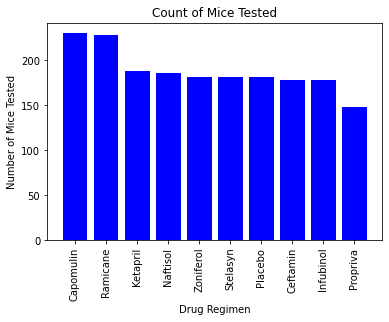

In [68]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

bar_sum = clean_df["Drug Regimen"].value_counts()
x_axis = bar_sum.index
y_axis = bar_sum.values
plt.bar(x_axis, y_axis, color = 'b')
plt.xticks(rotation = 90)
plt.title ("Count of Mice Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

<AxesSubplot:ylabel='Sex'>

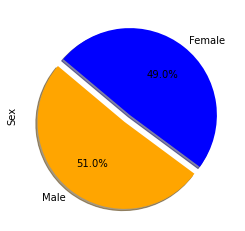

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_pie = clean_df["Sex"].value_counts()
explode = (0.1,0)
colors = ["orange","blue"]
gender_pie.plot.pie(y = gender_pie.values, explode = explode,colors = colors, autopct="%1.1f%%", shadow= True, startangle=140)

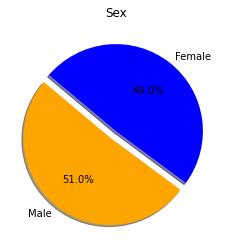

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie = clean_df["Sex"].value_counts()
labels = gender_pie.index
sizes = gender_pie.values
colors = ["orange", "blue"]
explode = (0.1,0)
plt.title("Sex")
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct="%1.1f%%", shadow= True, startangle=140)
plt.show()


## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_four = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_four = final_four.sort_values(["Timepoint"], ascending=True)
final_four

# Start by getting the last (greatest) timepoint for each mouse

last_greatest = clean_df.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_df = pd.merge(last_greatest,final_four, on=["Mouse ID", "Timepoint"], how="left")
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2.0,Infubinol,Female,20.0,23.0
1,a251,45,65.525743,1.0,Infubinol,Female,21.0,25.0
2,a262,45,NaN,NaN,NaN,NaN,NaN,NaN
3,a275,45,62.999356,3.0,Ceftamin,Female,20.0,28.0
4,a366,30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
243,z435,10,NaN,NaN,NaN,NaN,NaN,NaN
244,z578,45,30.638696,0.0,Ramicane,Male,11.0,16.0
245,z581,45,62.754451,3.0,Infubinol,Female,24.0,25.0
246,z795,45,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_regimen_list:
    tumor_volumes = merge_df["Tumor Volume (mm3)"].loc[merge_df["Drug Regimen"] == drug]
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}.')
    
    lower_bound = (lowerq - (1.5*iqr))
    upper_bound = (upperq + (1.5*iqr))
    print(f'For {drug}, values below {lower_bound} could be outlier.')
    print(f'For {drug}, values below {upper_bound} could be outlier.\n')
    
          

For Capomulin, Interquartile Range (IQR) is 7.781863460000004.
For Capomulin, values below 20.70456164999999 could be outlier.
For Capomulin, values below 51.83201549 could be outlier.

For Ramicane, Interquartile Range (IQR) is 9.098536719999998.
For Ramicane, values below 17.912664470000003 could be outlier.
For Ramicane, values below 54.30681135 could be outlier.

For Infubinol, Interquartile Range (IQR) is 11.477135160000003.
For Infubinol, values below 36.83290494999999 could be outlier.
For Infubinol, values below 82.74144559000001 could be outlier.

For Ceftamin, Interquartile Range (IQR) is 15.577752179999997.
For Ceftamin, values below 25.355449580000002 could be outlier.
For Ceftamin, values below 87.66645829999999 could be outlier.



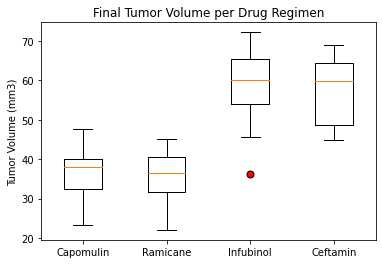

In [73]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = drug_regimen_list, flierprops={"markerfacecolor":"red","markersize":7})
plt.title("Final Tumor Volume per Drug Regimen")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

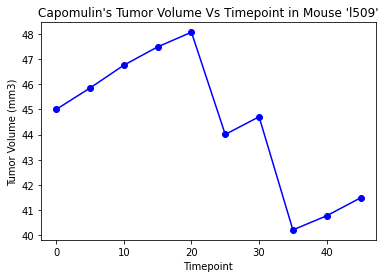

In [74]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse

# Display the timepoint and tumor volume for Mouse ID l509.
mouse_id_l509 = clean_df[["Timepoint","Tumor Volume (mm3)"]].loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "l509")]
mouse_id_l509

#line plot for Mouse ID l509
plt.plot(mouse_id_l509["Timepoint"], mouse_id_l509["Tumor Volume (mm3)"],color="blue", marker='o')
plt.title("Capomulin's Tumor Volume Vs Timepoint in Mouse 'l509'")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

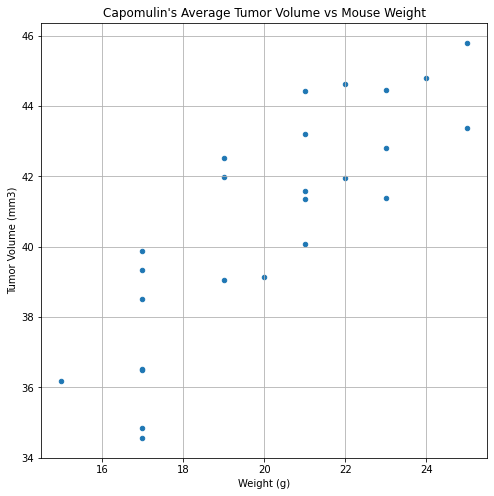

In [75]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
avg_tumor_vol = mouse_weight.groupby(["Mouse ID"]).mean()

avg_tumor_vol.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Capomulin's Average Tumor Volume vs Mouse Weight")
plt.show()

## Correlation and Regression

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = st.pearsonr(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"])[0]
print(f'The correlation between Mouse Wegith (g) and Average Tumor Volume is {round(corr,2)}.')

The correlation between Mouse Wegith (g) and Average Tumor Volume is 0.84.


In [77]:
#plot the linear regression model on top of the previouse scatter plot.
linear = st.linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol["Tumor Volume (mm3)"])
linear



LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134, intercept_stderr=2.590987686768349)

In [78]:
slope = 0.9544396890241045
intercept = 21.552160532685015

In [79]:
regression_values = avg_tumor_vol["Weight (g)"] * slope + intercept
regression_values

Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64

In [80]:
#Create the linear Equation.

linear_equ = "y = " + str(round(slope,2)) + " x +" + str(round(intercept,2))
print(f"The linear regression equation is {linear_equ}.")

The linear regression equation is y = 0.95 x +21.55.


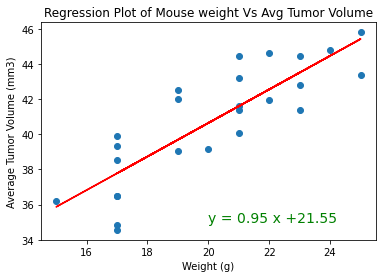

In [82]:
#Generate the plot.

plt.scatter(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"])
plt.plot(avg_tumor_vol["Weight (g)"], regression_values, "-r", color = 'red')
plt.annotate(linear_equ,(20,35), color="green", fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Regression Plot of Mouse weight Vs Avg Tumor Volume")
plt.show()